In [19]:
using Random
using PyPlot
using BenchmarkTools
using MulticlassPerceptron



# Synthetic data generator

In [20]:

uniform_sample_in_zero_maxval(n_features, maxval) = maxval .* (1 .- rand(n_features)) 

uniform_sample_in_minval_maxval(n_features, minval, maxval) = (maxval-minval) .* rand(n_features) .+ minval 

# x=rand() is a sample from N(0,1) =>  x2 = mu + sqrt(std)*rand() is a sample from  N(mu, std)
normal_sample(n_features, mu, var) = mu .+ sqrt(var) .* randn(n_features)


# make blobs

"""
    make_blobs(n_examples=100; 
               n_features=2, 
               centers=3, 
               cluster_std=1.0, 
               center_box=(-10.,10.),
               element_type=Float64,
               random_seed=1234,
               return_centers=false)
               
     Generates a dataset with `n_examples` of dimension `n_features` and returns a vector containing
     as integers the membership of the different points generated.

     The data is roughly grouped around several `centers`  which are created using `cluster_std`. 
     The data lives inside `center_box` in the case it is randomly generated.
     
     - If `centers` is an integer the centroids are created randomly.    
     - If `centers` is an Array containing points the centroids are picked from `centers`.
     - If `return_centers=true` the centroids of the bloods are returned

"""
function make_blobs(n_examples=100; n_features=2, 
                    centers=3, cluster_std=1.0, center_box=(-10.,10.),
                    element_type=Float64, random_seed=1234, return_centers=false)

    Random.seed!(random_seed)

    X = [] 
    y = []

    if typeof(centers)<: Int
        n_centers = centers
        centers = []
        for c in 1:n_centers
            center_sample = uniform_sample_in_minval_maxval(n_features, center_box[1], center_box[2])
            push!(centers, center_sample)
        end
    else
        n_centers = length(centers)
    end

    if typeof(cluster_std)<: AbstractFloat
        cluster_std = 0.5 * randn(n_centers)
    end
    
    # generates the nunber of example for each center
    n_examples_per_center = [div(n_examples, n_centers) for x  in 1:n_centers]
    for i in 1:(n_examples % n_centers)
        n_examples_per_center[i] += 1
    end

    # generates the actual vectors close to each center blob 
    for (i, (n, std, center)) in enumerate(zip(n_examples_per_center, cluster_std, centers))
        X_current = center' .+ std .* randn(element_type, (n, n_features))
        push!(X, X_current)
        push!(y, [i for k in 1:n]) 
    end

    # stack all the previous arrays created for each of the centers
    X = cat(X..., dims=1)
    y = cat(y..., dims=1)
    
    if return_centers
        return X, y, centers  
    else
        return X, y
    end
end

make_blobs

In [23]:
X, y, c = make_blobs(100; centers=3, random_seed=4, return_centers=true)
c

3-element Array{Any,1}:
 [3.6015847187148218, 7.488737862242317]
 [8.481401738563203, 8.586724376873917]
 [2.504782386597073, 4.745073928645937]

In [24]:
n_classes = length(unique(y))
n_features = 2

2

## Training a perceptron and visualizing the class assigned at the different regions

Epoch: 79 	 Accuracy: 0.97

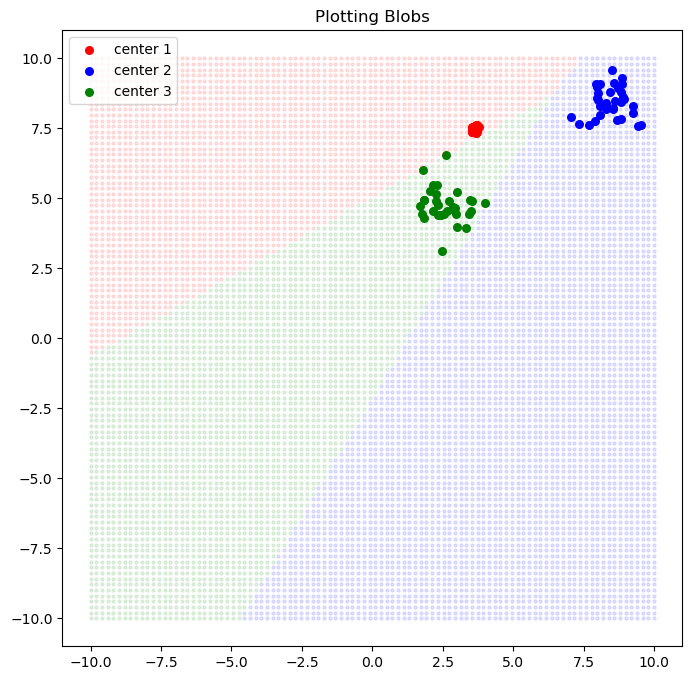

Epoch: 200 	 Accuracy: 1.0

PyObject <matplotlib.collections.PathCollection object at 0x7fe75533d9a0>

In [25]:
# Generate a synthetic dataset
X, y, c = make_blobs(100; centers=3, random_seed=4, return_centers=true)

# Fit a perceptron in the dataset
model = MulticlassPerceptronCore(Float64, n_classes, n_features, false)
fit!(model, X', y; n_epochs=200, verbosity=1)

# Generating a grid to plot the class values in the grid
xvalues = Array(range(-10,10,length=100));
square = Base.Iterators.product(xvalues, xvalues) |> collect
Xgrid = [[x[1] for x in square[:]] [x[2] for x in square[:]] ];
Ygrid = predict(model, Xgrid');

# Make the plot
colors = ["red","blue","green"]
X1 = X[y.==1,:]
X2 = X[y.==2,:]
X3 = X[y.==3,:]

fig = figure(figsize=(8,8))
title("Plotting Blobs")
R = scatter(X1[:,1], X1[:,2], color="red",   label = "center 1", s = 30)
G = scatter(X2[:,1], X2[:,2], color="blue",  label = "center 2", s = 30)
B = scatter(X3[:,1], X3[:,2], color="green", label = "center 3", s = 30)

legend()

scatter(Xgrid[Ygrid.==1, :][:,1],Xgrid[Ygrid.==1, :][:,2], color=colors[1],
        label = "center 3", s = 5, alpha=0.1)
scatter(Xgrid[Ygrid.==2, :][:,1],Xgrid[Ygrid.==2, :][:,2], color=colors[2],
        label = "center 3", s = 5, alpha=0.1)
scatter(Xgrid[Ygrid.==3, :][:,1],Xgrid[Ygrid.==3, :][:,2], color=colors[3],
        label = "center 3", s = 5, alpha=0.1)

Trying another set of bloobs

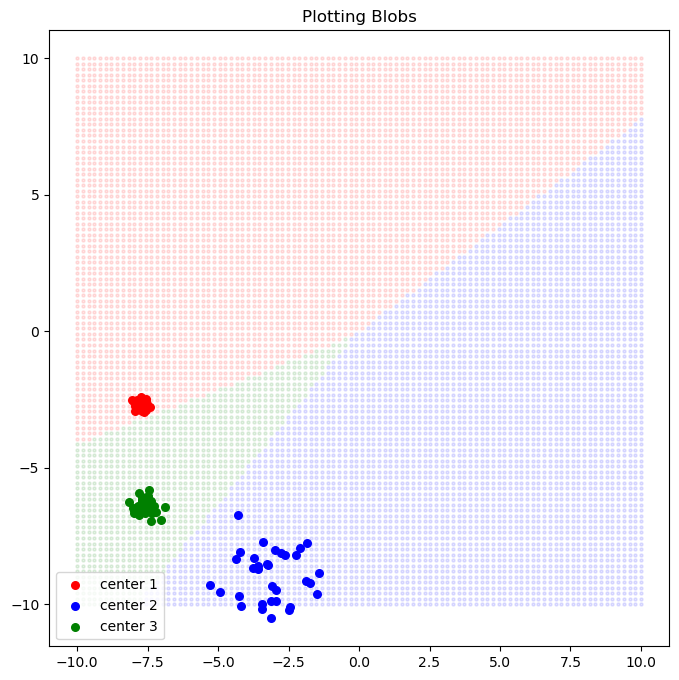

Epoch: 200 	 Accuracy: 1.0

PyObject <matplotlib.collections.PathCollection object at 0x7fe753c120a0>

In [26]:
# Generate a synthetic dataset
X, y, c = make_blobs(100; centers=3, random_seed=10, return_centers=true)

# Fit a perceptron in the dataset
model = MulticlassPerceptronCore(Float64, n_classes, n_features, false)
fit!(model, X', y; n_epochs=200, verbosity=1)

# Generate a grid to plot the class values in the grid
xvalues = Array(range(-10,10,length=100));
square = Base.Iterators.product(xvalues, xvalues) |> collect
Xgrid = [[x[1] for x in square[:]] [x[2] for x in square[:]] ];
Ygrid = predict(model, Xgrid');

# Make the plot
colors = ["red","blue","green"]
X1 = X[y.==1,:]
X2 = X[y.==2,:]
X3 = X[y.==3,:]

fig = figure(figsize=(8,8))
title("Plotting Blobs")
R = scatter(X1[:,1], X1[:,2], color="red",   label = "center 1", s = 30)
G = scatter(X2[:,1], X2[:,2], color="blue",  label = "center 2", s = 30)
B = scatter(X3[:,1], X3[:,2], color="green", label = "center 3", s = 30)

legend()

scatter(Xgrid[Ygrid.==1, :][:,1],Xgrid[Ygrid.==1, :][:,2], color=colors[1],
        label = "center 3", s = 5, alpha=0.1)
scatter(Xgrid[Ygrid.==2, :][:,1],Xgrid[Ygrid.==2, :][:,2], color=colors[2],
        label = "center 3", s = 5, alpha=0.1)
scatter(Xgrid[Ygrid.==3, :][:,1],Xgrid[Ygrid.==3, :][:,2], color=colors[3],
        label = "center 3", s = 5, alpha=0.1)